In [5]:
import matplotlib.pyplot as plt

[('Deepx DX-M1', {'TOPS': 25, 'Resnet50': 1035.92, 'Yolov5s': 248.39}), ('Deepx DX-M1M', {'TOPS': 25, 'Resnet50': 543.08, 'Yolov5s': 236.51})]


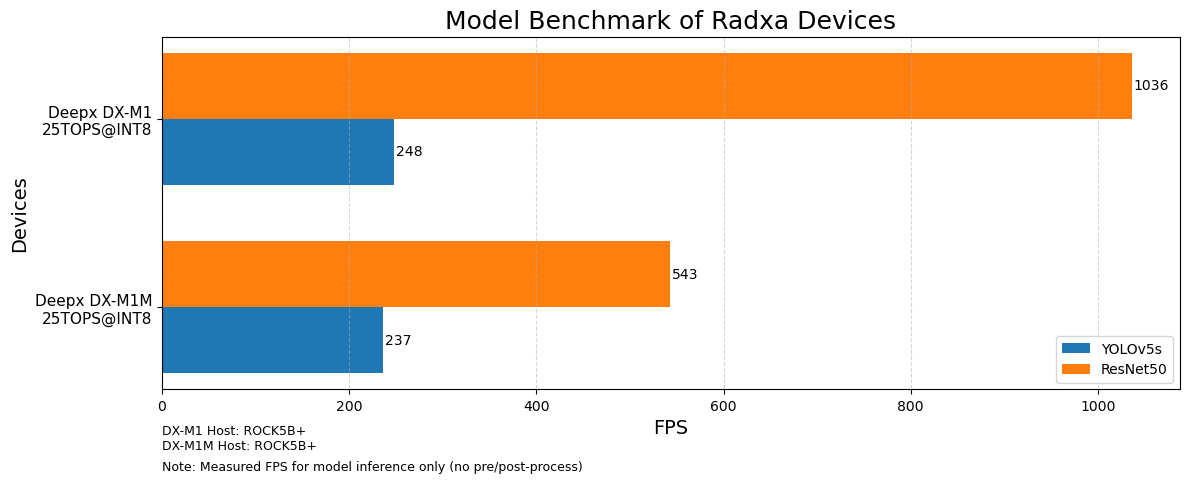

In [9]:
import matplotlib.pyplot as plt
import numpy as np

def horizontal_grouped_bar_chart(benchmark_dict, title='', xlabel='', ylabel='', group_names=None):
    # 1. 排序 SoCs：按 Yolov5s 值升序排列
    sorted_items = sorted(benchmark_dict.items(), key=lambda x: x[1]["Yolov5s"], reverse=True)
    print(sorted_items)
    # 2. 拆分排序后的数据
    labels = [f"{name}\n{info['TOPS']}TOPS@INT8" for name, info in sorted_items]
    yolov5s_values = [info["Yolov5s"] for _, info in sorted_items]
    resnet50_values = [info["Resnet50"] for _, info in sorted_items]
    
    n_groups = 2
    n_bars = len(labels)
    
    if group_names is None:
        group_names = ['Group 1', 'Group 2']
    
    bar_width = 0.35
    gap = 0.1  # 分组之间的间距
    bar_positions = np.arange(n_bars)

    # 动态图宽度以适配柱子数量
    fig, ax = plt.subplots(figsize=(12, 0.5 * n_bars + 4))
    
    # 3. 绘图
    bars1 = ax.barh(bar_positions + bar_width / 2, yolov5s_values, bar_width, label=group_names[0], color='#1f77b4')
    bars2 = ax.barh(bar_positions - bar_width / 2, resnet50_values, bar_width, label=group_names[1], color='#ff7f0e')

    # 添加标签
    for bars in [bars1, bars2]:
        for bar in bars:
            width = bar.get_width()
            ax.text(width + 2, bar.get_y() + bar.get_height() / 2, f'{width:.0f}', ha='left', va='center')

    # 4. 设置标签和标题
    ax.set_title(title, fontsize=18)
    ax.set_xlabel(xlabel, fontsize=14)
    ax.set_ylabel(ylabel, fontsize=14)
    ax.set_yticks(bar_positions)
    ax.set_yticklabels(labels, fontsize=11)
    ax.invert_yaxis()  # 横向排序从上到下
    ax.grid(True, axis='x', linestyle='--', alpha=0.5)
    ax.legend(loc='lower right')

    # 附注信息
    references = (
        "DX-M1 Host: ROCK5B+\n"
        "DX-M1M Host: ROCK5B+\n"
    )

    
    ax.annotate(references, xy=(0, -0.10), xycoords='axes fraction',
                ha='left', va='top', fontsize=9)

    ax.annotate("Note: Measured FPS for model inference only (no pre/post-process)",
                xy=(0, -0.20), xycoords='axes fraction',
                ha='left', va='top', fontsize=9)

    plt.tight_layout()
    plt.savefig('./asset/Model_Benchmark_Radxa_devices.png', dpi=600, bbox_inches='tight')
    plt.show()

# ✅ 数据
model_benchmark_dict = {
    "Deepx DX-M1": {"TOPS": 25, "Resnet50": 1035.92, "Yolov5s": 248.39},
    "Deepx DX-M1M": {"TOPS": 25, "Resnet50": 543.08, "Yolov5s": 236.51}
}

group_names = ['YOLOv5s', 'ResNet50']
horizontal_grouped_bar_chart(model_benchmark_dict, title='Model Benchmark of Radxa Devices', xlabel='FPS', ylabel='Devices', group_names=group_names)
